In [6]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("food.csv")
data.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


<ipython-input-24-71f7417b9689>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='Order Value', y='Discounts and Offers', inner='box', palette='Dark2')


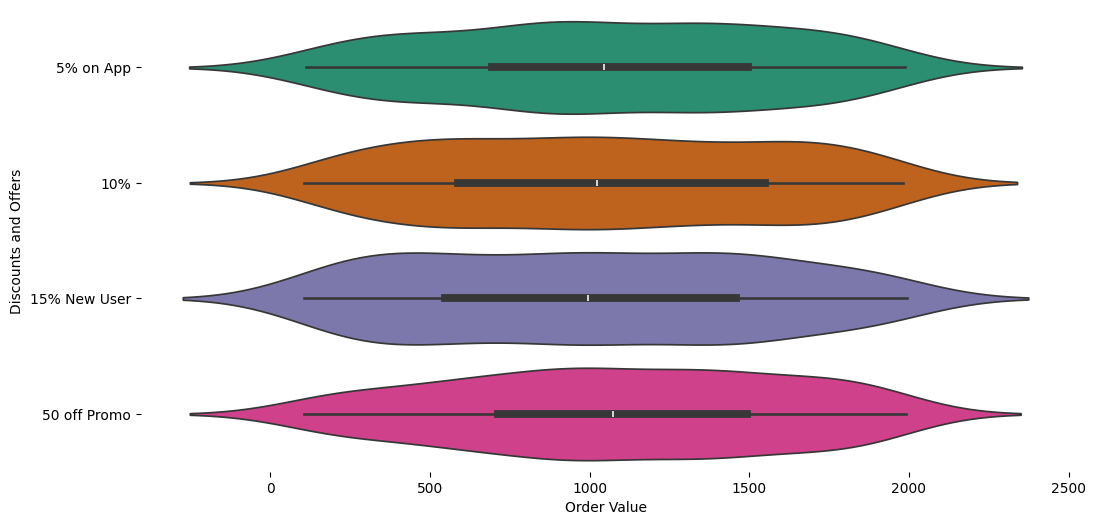

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Discounts and Offers'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Order Value', y='Discounts and Offers', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

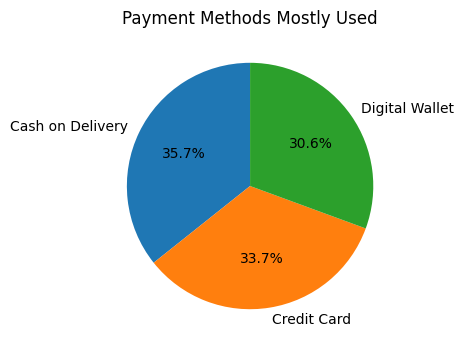

In [7]:
payment_counts = data['Payment Method'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Payment Methods Mostly Used')
plt.show()

In [9]:
restaurant_orders = data.groupby('Restaurant ID')['Order ID'].count().reset_index()
restaurant_orders.rename(columns={'Order ID': 'Order Count'}, inplace=True)

In [10]:
top_5_restaurants = restaurant_orders.sort_values(by='Order Count', ascending=False).head(5)

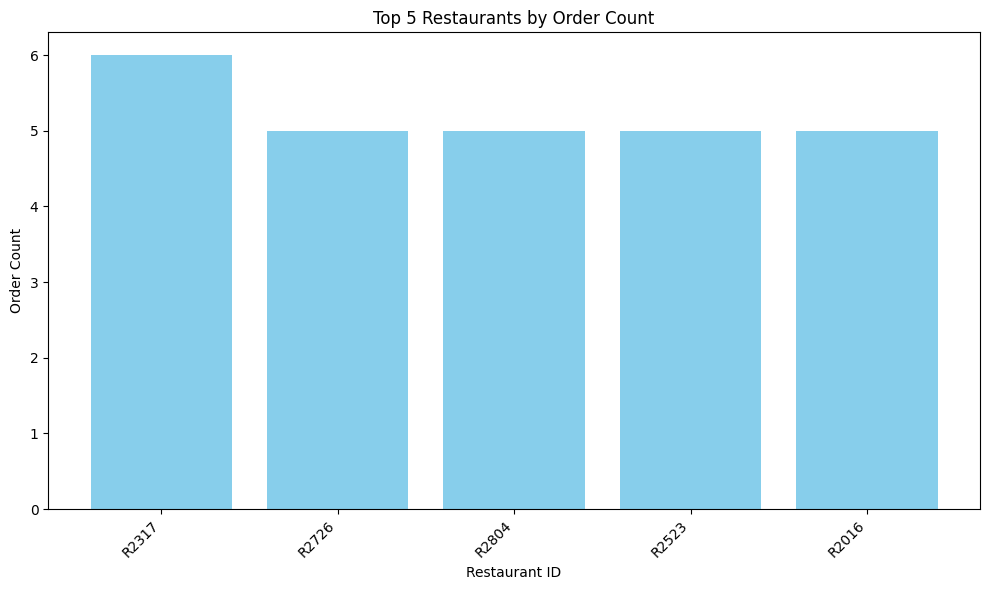

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_restaurants['Restaurant ID'], top_5_restaurants['Order Count'], color='skyblue')
plt.xlabel('Restaurant ID')
plt.ylabel('Order Count')
plt.title('Top 5 Restaurants by Order Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
data['Order Date'] = pd.to_datetime(data['Order Date and Time']).dt.date

In [27]:
orders_by_date = data.groupby('Order Date')['Order ID'].count().reset_index()
orders_by_date.rename(columns={'Order ID': 'Order Count'}, inplace=True)

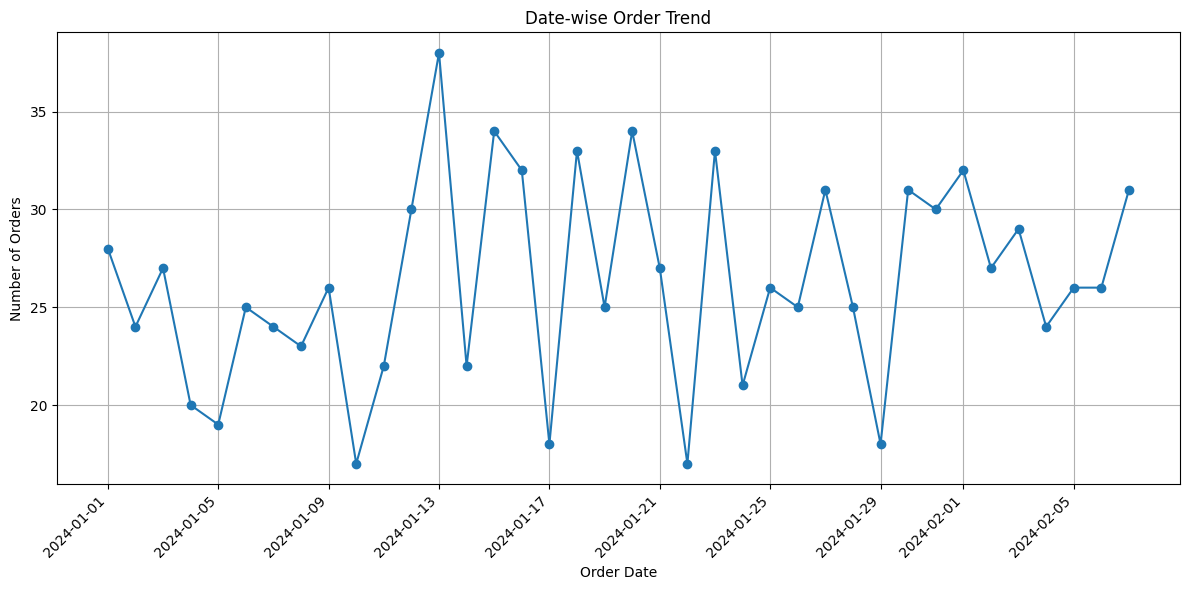

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(orders_by_date['Order Date'], orders_by_date['Order Count'], marker='o', linestyle='-')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.title('Date-wise Order Trend')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()